In [15]:
import numpy as np
import sys
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import pickle, json

# Add the parent directory so that the 'scripts' folder is on the path
sys.path.append(os.path.join(os.getcwd(), "..")) 
from API.model.LinearSVC import LinearSVM
from API.scripts.evaluate import ModelEvaluator

In [16]:
BASE_DIR = r"..\API\data\processed"
train_path = os.path.join(BASE_DIR, "train_data.csv")
test_path = os.path.join(BASE_DIR, "test_data.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

target_column = train_data.columns[-1]

X_train = train_data.drop(columns=[target_column]).values
y_train = train_data[target_column].values

X_test = test_data.drop(columns=[target_column]).values
y_test = test_data[target_column].values

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
#customSVC = LinearSVM(r"..\API\model\saved_models")
custom_svm = LinearSVM(learning_rate=0.01, lambda_param=0.1, n_iterations=500)
loss_history = custom_svm.train(X_train_scaled, y_train, verbose=True)

 67%|██████▋   | 337/500 [00:00<00:00, 1138.91it/s]

Iteration 100/500, Loss: 0.303969
Iteration 200/500, Loss: 0.291592
Iteration 300/500, Loss: 0.286264


100%|██████████| 500/500 [00:00<00:00, 1084.99it/s]

Iteration 400/500, Loss: 0.283741
Iteration 500/500, Loss: 0.282263


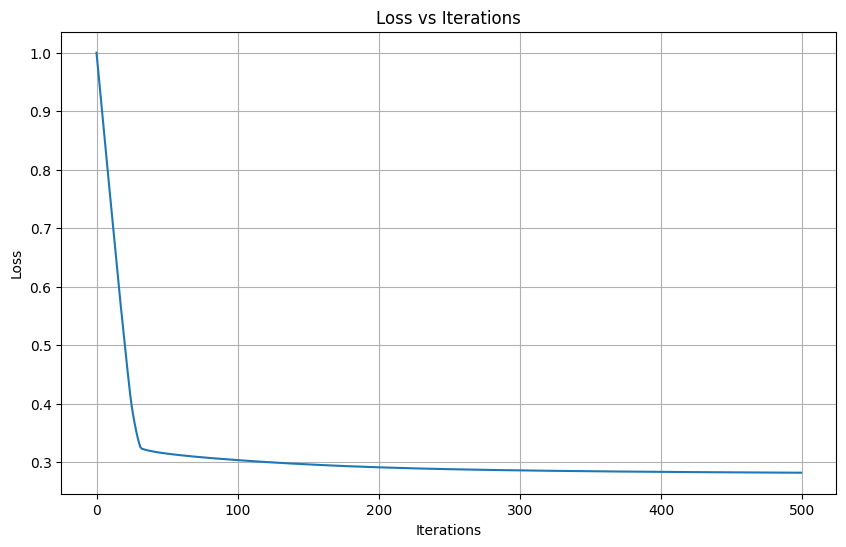

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

ACCURACY CALCULATIONS

In [19]:
custom_predictions = custom_svm.predict(X_test_scaled)
custom_accuracy = accuracy_score(y_test, custom_predictions)
print(f"Custom LinearSVM Accuracy: {custom_accuracy:.4f}")

Custom LinearSVM Accuracy: 0.8986


CONFUSION MATRIX

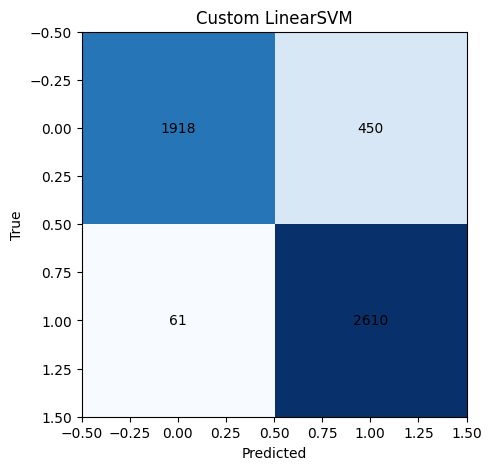

In [20]:
custom_cm = confusion_matrix(y_test, custom_predictions)


fig, ax1 = plt.subplots(figsize=(6, 5))
im1 = ax1.imshow(custom_cm, cmap='Blues')
ax1.set_title('Custom LinearSVM')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')
for i in range(custom_cm.shape[0]):
    for j in range(custom_cm.shape[1]):
        ax1.text(j, i, custom_cm[i, j], ha="center", va="center", color="black")

GRID SEARCH FOR FINDING BETTER HYPERPARAMETERS

In [21]:

#collections of parameters to find best parameter
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lambda_param': [0.001, 0.01, 0.1],
    'n_iterations': [500, 1000, 2000]
}

#intialize initial score and parameters 
best_score = 0
best_param = None

#iterate over all parameters to find best accuracy among all
for learning_rate in param_grid['learning_rate']:
    for lambda_param in param_grid['lambda_param']:
        for n_iterations in param_grid['n_iterations']:
            classifier = LinearSVM(learning_rate=learning_rate, lambda_param=lambda_param, n_iterations=n_iterations)
            classifier.train(np.array(X_train_scaled), np.array(y_train))  # Train the model
            y_pred = classifier.predict(np.array(X_test_scaled))  # Predict on test data
            test_acc = accuracy_score(y_test, y_pred)  # Compute accuracy
            
            print(f'Param: {learning_rate, lambda_param, n_iterations} \nScore: {test_acc} \n')
            
            if test_acc > best_score:
                best_score = test_acc
                best_param = {'learning_rate': learning_rate, 'lambda_param': lambda_param, 'n_iterations': n_iterations}

print(f'Best score: {best_score} \nBest param: {best_param}')


Param: (0.001, 0.001, 500) 
Score: 0.8755705497122445 

Param: (0.001, 0.001, 1000) 
Score: 0.8791426870410796 

Param: (0.001, 0.001, 2000) 
Score: 0.8936296884302442 

Param: (0.001, 0.01, 500) 
Score: 0.8755705497122445 

Param: (0.001, 0.01, 1000) 
Score: 0.8791426870410796 

Param: (0.001, 0.01, 2000) 
Score: 0.8936296884302442 

Param: (0.001, 0.1, 500) 
Score: 0.8755705497122445 

Param: (0.001, 0.1, 1000) 
Score: 0.8791426870410796 

Param: (0.001, 0.1, 2000) 
Score: 0.8928358801349474 

Param: (0.01, 0.001, 500) 
Score: 0.8975987299067275 

Param: (0.01, 0.001, 1000) 
Score: 0.8960111133161341 

Param: (0.01, 0.001, 2000) 
Score: 0.8952173050208375 

Param: (0.01, 0.01, 500) 
Score: 0.8972018257590791 

Param: (0.01, 0.01, 1000) 
Score: 0.8964080174637825 

Param: (0.01, 0.01, 2000) 
Score: 0.8944234967255408 

Param: (0.01, 0.1, 500) 
Score: 0.8985909902758484 

Param: (0.01, 0.1, 1000) 
Score: 0.8966064695376067 

Param: (0.01, 0.1, 2000) 
Score: 0.8848977971819806 

Param: 